# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [4]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [6]:
print(f'How many rows and columns does the dataset contain?')
print(data.shape)

print(f"\nAre there any NaN values present?")
print(data.isna().values.any())

print("\nAre there any duplicate rows?")
print(data.duplicated().values.any())
duplicated_rows = data[data.duplicated()]
print(f'Number of duplicates: {len(duplicated_rows)}')

print(f"\nWhat are the data types of the columns?")
for col in data:
  print(f'{type(data[col].dtype)} for {col}')

How many rows and columns does the dataset contain?
(5391, 6)

Are there any NaN values present?
False

Are there any duplicate rows?
False
Number of duplicates: 0

What are the data types of the columns?
<class 'numpy.dtype[int64]'> for Rank
<class 'numpy.dtype[object_]'> for Release_Date
<class 'numpy.dtype[object_]'> for Movie_Title
<class 'numpy.dtype[object_]'> for USD_Production_Budget
<class 'numpy.dtype[object_]'> for USD_Worldwide_Gross
<class 'numpy.dtype[object_]'> for USD_Domestic_Gross


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [7]:
for column in data.columns[3:6]:
    data[column] = data[column].astype(str).str.replace(',', "")
    data[column] = data[column].astype(str).str.replace('$', "")
    data[column] = pd.to_numeric(data[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [8]:
data.Release_Date = pd.to_datetime(data.Release_Date)

In [9]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [11]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [12]:
print("What is the average production budget of the films in the data set?")
data.USD_Production_Budget.mean()

What is the average production budget of the films in the data set?


31113737.57837136

In [13]:
print('What is the average worldwide gross revenue of films?')
data.USD_Worldwide_Gross.mean()

What is the average worldwide gross revenue of films?


88855421.96271564

In [14]:
print('How much revenue did the lowest and highest budget films make?')
data[data.USD_Production_Budget.isin([data.USD_Production_Budget.max(), data.USD_Production_Budget.min()])]

How much revenue did the lowest and highest budget films make?


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [15]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 domestically: {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False).head()

Number of films that grossed $0 domestically: 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [16]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 worldwide: {len(zero_worldwide)}')
zero_worldwide.sort_values('USD_Production_Budget', ascending=False).head()

Number of films that grossed $0 worldwide: 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


### Filtering on Multiple Conditions

So far, we've created subsets for our DataFrames based on a single condition. But what if we want to select our data based on more than one condition? For example, which films made money internationally
```
data.USD_Worldwide_Gross != 0
```
but had zero box office revenue in the United States

```
data.USD_Domestic_Gross == 0
```
?

How would we create a filter for these two conditions? One approach is to use the <code>.loc[]</code> property combined with the bitwise and & operator.

In [17]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [18]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [19]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [20]:
# Identify which films were not released yet as of the time of data collection (May 1st, 2018).
unreleased_films = data[data.Release_Date >= scrape_date]
print(f"Number of unreleased films on the date of scraping are: {len(unreleased_films)}")
unreleased_films

Number of unreleased films on the date of scraping are: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [21]:
# Create another DataFrame called data_clean that does not include these films.
data_clean = data.drop(unreleased_films.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [22]:
films_that_lost_money = data_clean.query('USD_Worldwide_Gross < USD_Production_Budget')
print(len(films_that_lost_money)/len(data_clean) == films_that_lost_money.shape[0]/data_clean.shape[0])
print(f'{int(len(films_that_lost_money)/len(data_clean)*1000)/10}%')

True
37.2%


# Seaborn for Data Viz: Bubble Charts

We're now ready to visualise our data. Today I want to introduce you to another popular data visualisation tool that you can use alongside plotly and Matplotlib: Seaborn. Seaborn is built on top of Matplotlib and it makes creating certain visualisations very convenient.
<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-15_09-09-20-72497b72e13443b2cebd18af668ac37e.png">

##### **Seaborn Scatter Plots**
To create a <a href="https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatterplot#seaborn.scatterplot"><code>.scatterplot()</code></a>, all we need to do is supply our DataFrame and the column names that we'd like to see on our axes.

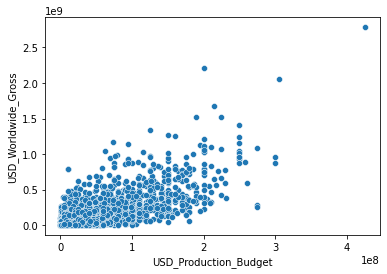

In [23]:
sns.scatterplot(data=data_clean,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross')

That should look familiar. 😊 Because Seaborn is built on top of Matplotlib, we can dive into the Matplotlib layer anytime to configure our chart. For example, we can increase the size of our figure:

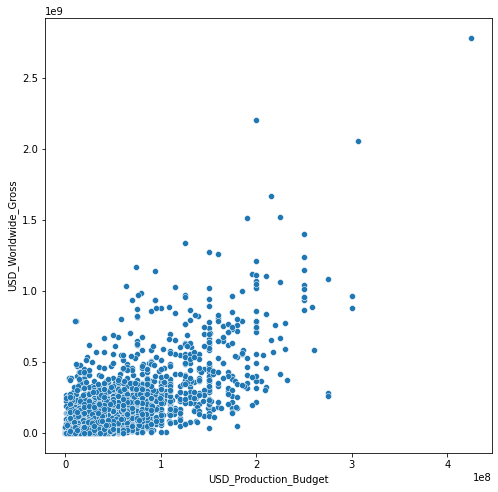

In [24]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=data_clean,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross')
plt.show()

And to style our chart we can simply configure the Axes object that is returned from <code>sns.scatterplot()</code>.
<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-15_09-19-14-d55c7a6c5b664184458469f081502617.png" width=600>

Here we're diving into the Matplotb layer to set the limits on the axes and change the labels.

Here's how:

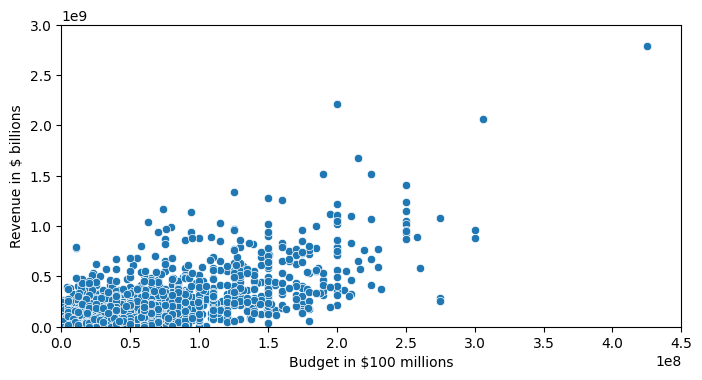

In [25]:
plt.figure(figsize=(8,4), dpi=100)
 
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
 
plt.show()

#### **From Scatter Plot to Bubble Chart**

But the reason we're using Seaborn is because of the <code>hue</code> and <code>size</code> parameters that make it very easy to create a bubble chart. These parameters allow us to colour the data and change their size according to one of the columns in our DataFrame.

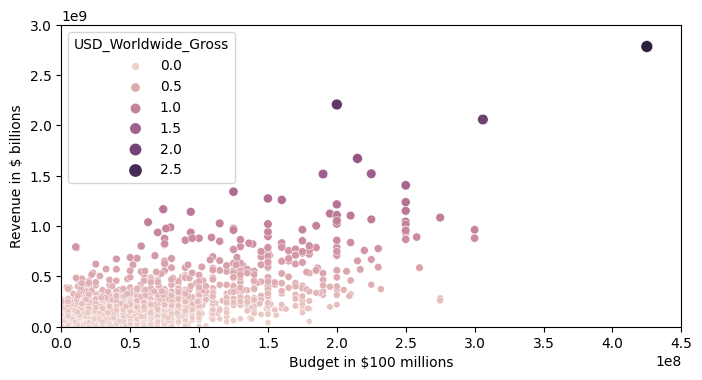

In [26]:
plt.figure(figsize=(8,4), dpi=100)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

Now our higher grossing movies are bigger and darker on our chart. That's super handy. But Seaborn offers a number of convenient styling options as well.

To set the styling on a single chart (as opposed to all the charts in the entire notebook) we can use Python's <code>with</code> keyword. We've seen <code>with</code> used already when it comes to opening files in previous lessons.

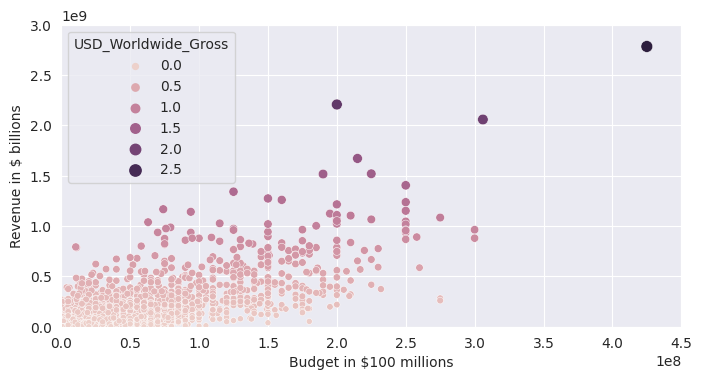

In [27]:
plt.figure(figsize=(8,4), dpi=100)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

In addition to <code>'darkgrid'</code>, Seaborn has a number of built-in themes. so you can style your chart very quickly. Try out <code>'whitegrid'</code>, <code>'dark'</code>,  or <code>'ticks'</code> for example.

### Plotting Movie Releases over Time

**Challenge**: 

Now that you've seen how to create a beautiful bubble chart in Seaborn, it's time to create your own. Can you write the code to replicate this chart? Notice how we are actually representing THREE dimensions in this chart: the budget, the release date, and the worldwide revenue. This is what makes bubble charts so awesomely informative.

Try to create the following Bubble Chart:

<img src="https://i.imgur.com/8fUn9T6.png" width=700>



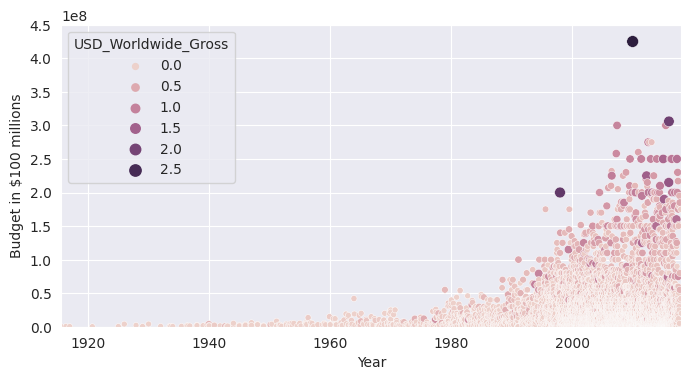

In [28]:
plt.figure(figsize=(8,4), dpi=100)
 
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='Release_Date', 
                       y='USD_Production_Budget',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 450000000),
         xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
         ylabel='Budget in $100 millions',
         xlabel='Year')

What do we see here? What is this chart telling us? Well, first off, movie budgets have just exploded in the last 40 years or so. Up until the 1970s, the film industry appears to have been in an entirely different era. Budgets started growing fast from the 1980s onwards and continued to grow through the 2000s. Also, the industry has grown massively, producing many more films than before. The number of data points is so dense from 2000 onwards that they are overlapping.

# Converting Years to Decades Trick

In our bubble charts, we've seen how massively the industry has changed over time, especially from the 1970s onwards. This makes me think it makes sense to separate our films out by decade. Here's what I'm after:

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [29]:
date_index = pd.DatetimeIndex(data=data_clean.Release_Date)
data_clean["Decade"] = (date_index.year // 10) * 10
data_clean.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
1240,1025,1999-05-02,Payback,50000000,161626121,81526121,1990
2392,2501,2005-03-18,Steamboy,20000000,10468867,468867,2000
4492,5020,2013-11-10,Escape from Tomorrow,650000,171962,171962,2010
1335,4320,1999-10-29,Dreaming of Joseph Lees,3250000,7680,7680,1990
4822,1118,2015-02-10,Shanghai,50000000,15505922,46425,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [30]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]

In [31]:
print("How many films were released prior to 1970?")
print(f"There were {old_films.Movie_Title.count()} movies")

How many films were released prior to 1970?
There were 153 movies


In [32]:
print("What was the most expensive film made prior to 1970?")
print(f"Most expensive film had a budget of ${old_films.USD_Production_Budget.max()/1000000} milions.")

What was the most expensive film made prior to 1970?
Most expensive film had a budget of $42.0 milions.


In [33]:
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77","4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
std,742.14,"5,713,648.85","54,931,828.93","32,641,752.41",12.72
min,"1,253.00","100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00","1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00","2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00","5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00","42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"


In [34]:
old_films.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


The most expensive film prior to 1970 was Cleopatra, with a production budget of $42 million. That's some serious 1960s money, and judging by the trailer, a lot of it went into extravagant costumes, set design, and plenty of extras. Impressive.

# Seaborn Regression Plots

Let's visualise the relationship between the movie budget and the worldwide revenue using linear regression. Seaborn makes this incredibly easy with the <a href="https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot"><code>.regplot()</code></a> function.

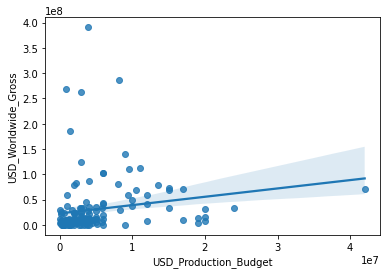

In [35]:
sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

**Challenge**: Use Seaborn's <a href="https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot"><code>.regplot()</code></a> to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

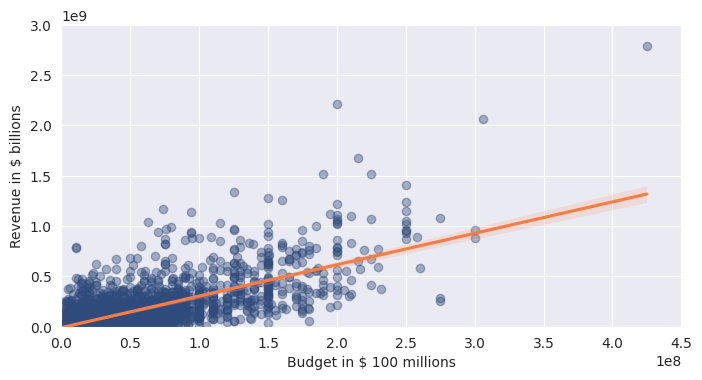

In [36]:
plt.figure(figsize=(8,4), dpi=100)

with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x = 'USD_Production_Budget',
                   y = 'USD_Worldwide_Gross',
                   scatter_kws = {'alpha': 0.4},
                   line_kws = {'color': '#ff7c43'},
                   color = '#2f4b7c')

  ax.set(xlim=(0, 450000000),
         ylim=(0, 3000000000),
         xlabel="Budget in $ 100 millions",
         ylabel="Revenue in $ billions")

How do we interpret our chart? This time we are getting a much better fit, compared to the old films. We can see this visually from the fact that our data points line up much better with our regression line (pun intended). Also, the confidence interval is much narrower. We also see that a film with a \$150 million budget is predicted to make slightly under \$500 million by our regression line

All in all, we can be pretty confident that there does indeed seem to be a relationship between a film's budget and that film's worldwide revenue.

But how much of the variation in revenue does the budget actually explain? And how much extra revenue can we expect for an additional $1 increase in the budget? To find out, we need to dive into the numbers underlying our regression model.

# Run Your Own Regression with scikit-learn

Let's dive into our linear regression model a bit more. We are using a **univariate** regression. This is a regression with a single **explanatory variable** (our movie BUDGET). Explanatory variables are also referred to as **features** in machine learning terminology.

Using our data on budgets, the linear regression estimates the best possible line to fit our movie revenues. The regression line has the following structure:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-16_15-19-24-b9cd86771c12cda554da251a16471df9.png" width=400>

To find the best possible line, our regression will estimate the y-intercept ("theta zero") and the slope ("theta one"). The line's **intercept** on the y-axis tells us how much revenue a movie would make if the budget was 0. The **slope** tells us how much extra revenue we get for a $1 increase in the movie budget.

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-16_15-31-02-3bdbeb669ce3d7ecebe72abb986e8d35.png" width=400>

So how can we find out what our model's estimates are for theta-one and theta-zero? And how can we run our own regression, regardless of whether we want to visualise it on a chart? For that, we can use <a href="https://scikit-learn.org/stable/">scikit-learn</a>.




Import scikit-learn

Let's add the LinearRegression from scikit-learn to our notebook.

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-16_15-35-31-9dd5b42978718c28394b328f636862ae.png" width=400>

Now we can run a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression</a>. First, let's create a `LinearRegression` object that will do the work for us.

In [48]:
regression = LinearRegression()

Now we should specify our features and our targets (i.e., our response variable). You will often see the features named capital X and the target named lower case y:

In [49]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

Our `LinearRegression` does not like receiving Pandas Series (e.g., `new_films.USD_Production_Budget`), so I've created some new DataFrames here.

Now it's time to get to work and run the calculations:

In [50]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

That's it. Now we can look at the values of theta-one and theta-zero from the equation above.

In [51]:
# Theta zero
regression.intercept_

array([-8650768.00661027])

In [52]:
# Theta one
regression.coef_

array([[3.12259592]])

Both `intercept_` and `coef_` are simply <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">attributes of the LinearRegression</a> object. Don't worry about the underscores at the end, these are simply part of the attribute names that the scikit-learn developers have chosen.

How do we interpret the y-intercept? Literally, means that if a movie budget is \$0, the estimated movie revenue is -\$8.65 million. Hmm... so this is clearly unrealistic. Why would our model tell us such nonsense? Well, the reason is that we are specifying what the model should be ahead of time - namely a straight line - and then finding the best straight line for our data. Considering that you can't have negative revenue or a negative budget, we have to be careful about interpreting our very simple model too literally. After all, it's just an estimate and this estimate will be the most accurate on the chart where we have the most data points (rather than at the extreme left or right).

What about the slope? The slope tells us that for every extra $1 in the budget, movie revenue increases by \$3.1. So, that's pretty interesting. That means the higher our budget, the higher our estimated revenue. If budgets are all that matter to make lots of money, then studio executives and film financiers should try and produce the biggest films possible, right? Maybe that's exactly why we've seen a massive increase in budgets over the past 30 years.

### **R-Squared: Goodness of Fit**
One measure of figuring out how well our model fits our data is by looking at a metric called r-squared. This is a good number to look at in addition to eyeballing our charts.

In [43]:
# R-squared
regression.score(X, y)

0.5577032617720403

We see that our r-squared comes in at around 0.558. This means that our model explains about 56% of the variance in movie revenue. That's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable. The real world is *super complex*, so in many academic circles, if a researcher can build a simple model that explains over 50% or so of what is actually happening, then it's a pretty decent model.

Remember how we were quite sceptical about our regression looking at the chart for our `old_films`? 

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [60]:
old_reg = LinearRegression()
old_X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
old_y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
old_reg.fit(old_X, old_y)
print(f'The intercept is: {int(old_reg.intercept_[0])}')
print(f'The slope coefficient is: {old_reg.coef_[0][0]}')
print(f'The r-squared is: {old_reg.score(old_X, old_y)}')

The intercept is: 22821538
The slope coefficient is: 1.6477131440107315
The r-squared is: 0.02937258620576877


#### **Solution: A bad fit**

Running the numbers this time around, we can confirm just how inappropriate the linear model is for the pre-1970 films. We still see a positive relationship between budgets and revenue, since the slope (our theta-one) is 1.6, but the r-squared is very low.

This makes sense considering how poorly our data points aligned with our line earlier.

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-16_16-43-08-86be88ceaa656f3a0c07f04d3cf0dac7.png" width=600>

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [89]:
modern_revenue = -8650768 + 3.12259592 * 350000000
print(f"A modern movie, with a budget of $350 millions is estimated to generate a revenue of ${modern_revenue:.10}.")
old_revenue = 22821538 + 1.64771314 * 350000000
print(f"A old movie, with a budget of $350 millions is estimated to generate a revenue of ${old_revenue:.10}.")

A modern movie, with a budget of $350 millions is estimated to generate a revenue of $1.084257804e+09.
A old movie, with a budget of $350 millions is estimated to generate a revenue of $599521137.0.


In [87]:
budget = 350000000
revenue_estimate = old_reg.intercept_[0] + old_reg.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -5)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $599500000.0.


(The colon : and dot . in a print statement is quite handy for controlling the number of digits you'd like to show up in the output)